In [1]:
from metaflow import Flow, get_metadata
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

print("Current metadata provider: %s" % get_metadata())

Current metadata provider: local@/Users/sonoffungdark/Projects/fences/fences


In [2]:
run = Flow('TransactionDeduplicationFlow').latest_successful_run
print("Using run: %s" % str(run))

dupe_df = run.data.df

Using run: Run('TransactionDeduplicationFlow/1713208956416235')


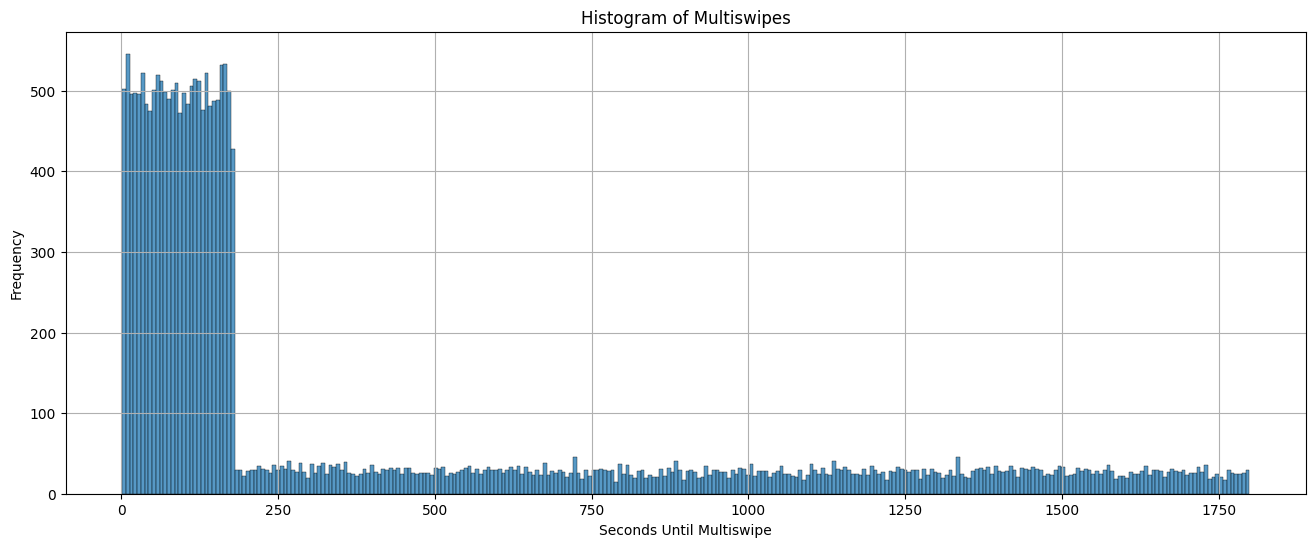

In [3]:
# Visualize recurring merchant transactions within a 30 minute window
plt.figure(figsize=(16, 6))
sns.histplot(data=dupe_df[(dupe_df["multiSwipeDiffSeconds"]<1800) & (dupe_df["multiSwipeDiffSeconds"]!=0)], x="multiSwipeDiffSeconds", bins=300)
plt.title("Histogram of Multiswipes")
plt.xlabel("Seconds Until Multiswipe")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

In [10]:
dupe_df["merchantRecurrenceDiffSeconds"] = None
cond = (dupe_df["merchantRecurrenceCount"]>1)
dupe_df["merchantRecurrenceDiffSeconds"] = dupe_df["merchantRecurrenceDiffSeconds"].case_when([(cond, dupe_df["multiSwipeDiffSeconds"])])
dupe_df.head()

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud,merchantRecurrenceCount,multiSwipeDiffSeconds,merchantRecurrenceDiffSeconds
0,737265056,737265056,5000,5000.0,2016-08-13 14:27:32,98.55,Uber,US,US,2.0,...,NaN,NaN,False,NaN,NaN,False,False,1,0.0,None
1,737265056,737265056,5000,5000.0,2016-10-11 05:05:54,74.51,AMC #191138,US,US,9.0,...,NaN,NaN,True,NaN,NaN,False,False,1,0.0,None
2,737265056,737265056,5000,5000.0,2016-11-08 09:18:39,7.47,Play Store,US,US,9.0,...,NaN,NaN,False,NaN,NaN,False,False,2,0.0,0.0
3,737265056,737265056,5000,5000.0,2016-12-10 02:14:50,7.47,Play Store,US,US,9.0,...,NaN,NaN,False,NaN,NaN,False,False,2,2739371.0,2739371.0
4,830329091,830329091,5000,5000.0,2016-03-24 21:04:46,71.18,Tim Hortons #947751,US,US,2.0,...,NaN,NaN,True,NaN,NaN,False,False,1,0.0,None
